In [1]:
# Importing libraries
import nasdaqdatalink
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
nasdaqdatalink.ApiConfig.api_key = '4esb635oAoomCLyyTVns'
nasdaqdatalink.get_table('ZILLOW/DATA')

C:\Users\nickr\anaconda3\Lib\site-packages\nasdaqdatalink\get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         nasdaqdatalink.get_table() call. For more information see our documentation:         https://github.com/Nasdaq/data-link-python/blob/main/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


indicator_id region_id       date          value
None                                                 
0            ZSFH     99999 2024-07-31  486230.166077
1            ZSFH     99999 2024-06-30  485893.210056
2            ZSFH     99999 2024-05-31  484599.091201
3            ZSFH     99999 2024-04-30  481777.608669
4            ZSFH     99999 2024-03-31  480423.651093
...           ...       ...        ...            ...
9995         ZSFH     99959 2017-04-30  327998.635842
9996         ZSFH     99959 2017-03-31  324828.631501
9997         ZSFH     99959 2017-02-28  321684.047119
9998         ZSFH     99959 2017-01-31  318551.305596
9999         ZSFH     99959 2016-12-31  315427.251855

[10000 rows x 4 columns]

In [3]:
nasdaqdatalink.ApiConfig.api_key = '4esb635oAoomCLyyTVns'
nasdaqdatalink.get_table('ZILLOW/REGIONS')

C:\Users\nickr\anaconda3\Lib\site-packages\nasdaqdatalink\get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         nasdaqdatalink.get_table() call. For more information see our documentation:         https://github.com/Nasdaq/data-link-python/blob/main/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


region_id region_type                                             region
None                                                                         
0        99999         zip   98847;WA;Wenatchee, WA;Leavenworth;Chelan County
1        99998         zip               98846;WA;nan;Pateros;Okanogan County
2        99997         zip    98845; WA; Wenatchee; Douglas County; Palisades
3        99996         zip              98844;WA;nan;Oroville;Okanogan County
4        99995         zip       98843;WA;Wenatchee, WA;Orondo;Douglas County
...        ...         ...                                                ...
9995     87003         zip  65783; MO; Springfield, MO; Dallas County; Win...
9996     87002         zip     65781;MO;Springfield, MO;Willard;Greene County
9997     87001         zip                    65779;MO;nan;nan;Hickory County
9998     87000         zip                  65778;MO;nan;Myrtle;Oregon County
9999       870      county                     Benton County;OR;Corvallis, OR

[10000 rows x 3 columns]

In [4]:
# Importing Zillow Data
df = nasdaqdatalink.get_table('ZILLOW/DATA')

C:\Users\nickr\anaconda3\Lib\site-packages\nasdaqdatalink\get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         nasdaqdatalink.get_table() call. For more information see our documentation:         https://github.com/Nasdaq/data-link-python/blob/main/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


In [5]:
df.head()

indicator_id region_id       date          value
None                                                 
0            ZSFH     99999 2024-07-31  486230.166077
1            ZSFH     99999 2024-06-30  485893.210056
2            ZSFH     99999 2024-05-31  484599.091201
3            ZSFH     99999 2024-04-30  481777.608669
4            ZSFH     99999 2024-03-31  480423.651093

In [6]:
# Grouping data based on monthly average
df['date'] = pd.to_datetime(df['date'])

In [7]:
df_grouped = df.groupby(df['date'].dt.to_period('M')).agg({'value': 'mean'}).reset_index()

In [8]:
df_grouped['date'] = df_grouped['date'].astype(str)

In [9]:
print(df_grouped)

        date          value
0    1996-01  144105.857143
1    1996-02  144639.571429
2    1996-03  144922.000000
3    1996-04  145506.714286
4    1996-05  146361.571429
..       ...            ...
338  2024-03  460654.524462
339  2024-04  462714.281016
340  2024-05  464742.770947
341  2024-06  466148.830660
342  2024-07  472954.816494

[343 rows x 2 columns]


In [10]:
df_grouped.shape

(343, 2)

In [11]:
type(df_grouped)

pandas.core.frame.DataFrame

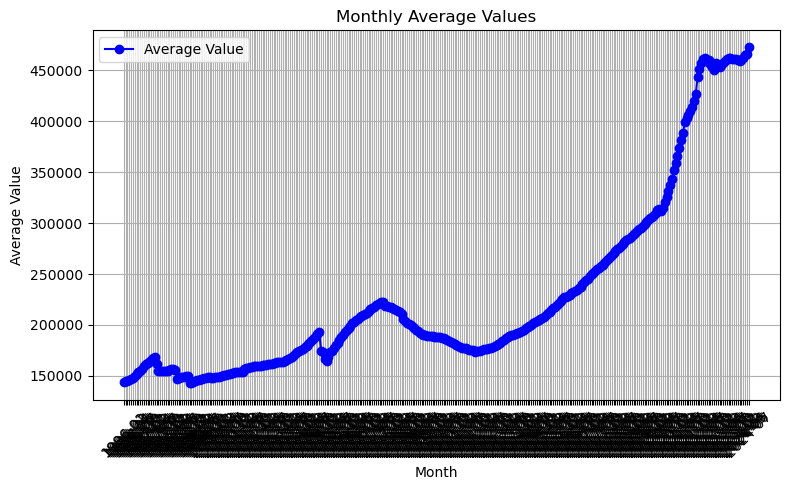

In [12]:
# Graphing values
dates = df_grouped['date'].astype(str) # Convert date to string for plotting
values = df_grouped['value'].to_numpy() # Convert values to NumPy array
plt.figure(figsize=(8, 5))
plt.plot(dates, values, marker='o', linestyle='-', color='b', label='Average Value')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [33]:

df_grouped = df_grouped.asfreq('MS')


In [15]:
df_grouped.isnull()

date  value
1970-01-01  True   True

In [43]:

df_grouped = df_grouped.fillna(0)

In [45]:
# Setting date column as the index
df_grouped.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [39]:
# Decomposing data
decomposition = sm.tsa.seasonal_decompose(df_grouped['value'], model='additive', period=12)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)

In [ ]:
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_grouped)